# Disease Identification by Random Forest

## Linear Algebra

In [1]:
import numpy as np

## Data preprocessing

In [3]:
import pandas as pd

## Algorithms

In [4]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## getting the data from the file

In [5]:
df= pd.read_csv("C:/Users/sharm/OneDrive/Desktop/Machine Learning pro/prodata.data", names =  ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon", "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement", "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate", "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "thinning of the suprapapillary epidermis", "spongiform pustule", "Age", "class"])


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (2, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0) to (3, 2, 2, 0, 0, 0, 0, 0, 3, 3, 0)
Data columns (total 24 columns):
erythema                                    366 non-null int64
scaling                                     366 non-null int64
definite borders                            366 non-null int64
itching                                     366 non-null int64
koebner phenomenon                          366 non-null int64
polygonal papules                           366 non-null int64
follicular papules                          366 non-null int64
oral mucosal involvement                    366 non-null int64
knee and elbow involvement                  366 non-null int64
scalp involvement                           366 non-null int64
family history                              366 non-null int64
melanin incontinence                        366 non-null int64
eosinophils in the infiltrate               366 non-null int64
PNL infiltrate

In [7]:
print(df.describe())

         erythema     scaling  definite borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     0.404372    0.139344          0.546448    0.336066   
std      0.869818    0.411790          0.815451    0.853139   
min      0.000000    0.000000          0.000000    0.000000   
25%      0.000000    0.000000          0.000000    0.000000   
50%      0.000000    0.000000          0.000000    0.000000   
75%      0.000000    0.000000          1.000000    0.000000   
max      3.000000    2.000000          3.000000    3.000000   

       koebner phenomenon  polygonal papules  follicular papules  \
count          366.000000         366.000000          366.000000   
mean             1.368852           1.956284            0.527322   
std              1.104418           0.712512            0.757116   
min              0.000000           0.000000            0.000000   
25%              0.000000           2.000000            0.000000   
50%              2.00000

In [8]:
print(df.head(15))

                       erythema  scaling  definite borders  itching  \
2 2 0 3 0 0 0 0 1 0 0         0        0                 0        0   
3 3 3 2 1 0 0 0 1 1 1         0        0                 1        0   
2 1 2 3 1 3 0 3 0 0 0         1        0                 0        0   
  2 2 0 0 0 0 0 3 2 0         0        0                 3        0   
  3 2 2 2 2 0 2 0 0 0         1        0                 0        0   
      0 0 0 0 0 0 0 0         0        2                 1        0   
  1 0 2 0 0 0 0 0 0 0         0        0                 0        3   
  2 3 3 3 3 0 2 0 0 0         2        0                 0        0   
    1 0 2 0 0 0 0 0 0         0        0                 0        0   
        1 0 0 0 0 0 0         0        0                 0        0   
3 3 2 1 1 0 0 0 2 2 1         0        0                 0        0   
2 2 0 3 0 0 0 0 0 0 0         0        0                 2        0   
3 3 1 2 0 0 0 0 0 1 0         0        0                 2        0   
2 3 3 

## Dealing with the missing values

In [9]:
print("Missing values")
print((df["Age"] == "?").sum())

Missing values
8


In [10]:
df[["Age"]] = df[["Age"]].replace("?", np.NaN)

In [11]:
# drop rows with missing values
df.dropna(inplace=True)

In [12]:
# summarize the number of rows and columns in the dataset
print(df.shape)

(358, 24)


In [13]:
print("Missing values")
print((df["Age"] == "?").sum())

Missing values
0


## Preaparing data for Training

In [14]:
data = df.iloc[:, 0:-1].values
target = df.iloc[:, -1].values


## Splitting the data 

In [15]:
data_train,data_test,target_train,target_test = train_test_split(data,target,test_size = 0.3, random_state = 0)


## Feature Scaling

In [16]:
sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test  = sc.fit_transform(data_test)


C:\Users\sharm\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Training the Model

In [17]:
#Training the model
random_forest = RandomForestClassifier(n_estimators = 3)
random_forest.fit(data_train, target_train)

prediction_forest = random_forest.predict(data_test)

accuracy = round( random_forest.score(data_train, target_train)*100 , 2)
print("Accuracy of Random forest with 3 estimators")
print(round(accuracy, 2), "%")



Accuracy of Random forest with 3 estimators
97.6 %


## Checking for the best no. of estimators

In [21]:
max=0
accu_list = []
for i in range (1,101):
    random_forest = RandomForestClassifier(n_estimators = i)
    random_forest.fit(data_train, target_train)
    prediction_forest = random_forest.predict(data_test)
    accuracy = round( random_forest.score(data_train, target_train)*100 , 2)
    accu_list.append(round(accuracy,2))
    if max < round(accuracy,2):
        max = round(accuracy,2)
        no = i
print("Best no. of Estimators are",no)



Best no. of Estimators are 10


## Visualize the Accuracy

In [30]:
import matplotlib.pyplot as plt
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


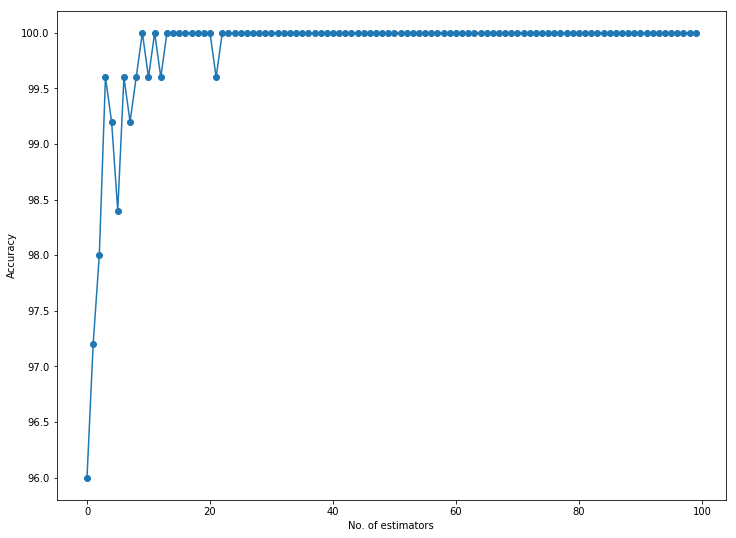

In [31]:
plt.plot(accu_list,'o-')
plt.xlabel("No. of estimators")
plt.ylabel("Accuracy")

plt.show()